## Preprocessing

In [134]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
df=pd.read_csv("AW_AveMonthSpend.csv")
df1=pd.read_csv("AdvWorksCusts.csv")
df2=pd.read_csv("AW_BikeBuyer.csv")



In [136]:
df.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [137]:
df["AveMonthSpend"].min()

22

In [138]:
len(df['CustomerID'].unique())

16404

In [139]:
def keep_unique(df):
    lis=[]
    for x in df["CustomerID"]:
        if x in lis:
            df.drop(axis=0, inplace=True, labels=df[df["CustomerID"]==x].index[0])
        else:
            lis.append(x)

keep_unique(df)
len(df['CustomerID'])   

16404

In [140]:
df.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [141]:
keep_unique(df1)

In [142]:
keep_unique(df2)
df2["BikeBuyer"].sum()

5455

In [143]:
def cat_median():
    a=df1.loc[:,["YearlyIncome", "Occupation"]]
    b=a["Occupation"].unique()
    lis=[]
    for x in b:
        temp_df=a[a["Occupation"]==x]
        lis.append(x)
        lis.append(temp_df.median())
    return lis
print(cat_median())


['Professional', YearlyIncome    99058.0
dtype: float64, 'Management', YearlyIncome    118781.0
dtype: float64, 'Skilled Manual', YearlyIncome    66471.5
dtype: float64, 'Clerical', YearlyIncome    49481.0
dtype: float64, 'Manual', YearlyIncome    21722.0
dtype: float64]


In [144]:
df=pd.merge(df,df1, how='outer', left_on='CustomerID', right_on='CustomerID') 

In [145]:
for x in range (len(df["BirthDate"])):
    df["BirthDate"][x]= np.int64(str((pd.Timestamp('9/1/2016')-pd.Timestamp(df["BirthDate"][x]))/366).split()[0])
df["Age"]= df["BirthDate"]

C:\Users\prakash\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
type(np.int64(str(df["BirthDate"][0]).split()[0]))

numpy.int64

In [147]:
temp=df[df["MaritalStatus"]=="M"]["AveMonthSpend"].median()
temp2=df[df["MaritalStatus"]=="S"]["AveMonthSpend"].median()
print(temp,temp2)

74.0 62.0


In [148]:
temp=df[df["NumberCarsOwned"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberCarsOwned"]>=3]["AveMonthSpend"].median()
print(temp,temp2)

65.0 96.0


In [149]:
temp=df[df["Gender"]=="M"]["AveMonthSpend"].describe()
temp2=df[df["Gender"]=="F"]["AveMonthSpend"].describe()
print(temp,temp2)

count    8290.000000
mean       87.826659
std        26.947794
min        29.000000
25%        70.000000
50%        79.000000
75%        96.000000
max       176.000000
Name: AveMonthSpend, dtype: float64 count    8114.000000
mean       56.620532
std        16.413050
min        22.000000
25%        46.000000
50%        52.000000
75%        61.000000
max       114.000000
Name: AveMonthSpend, dtype: float64


In [150]:
temp=df[df["NumberChildrenAtHome"]==0]["AveMonthSpend"].median()
temp2=df[df["NumberChildrenAtHome"]>=1]["AveMonthSpend"].median()
print(temp,temp2)

57.0 88.0


In [151]:
df=pd.merge(df,df2, how='outer', left_on='CustomerID', right_on='CustomerID')

In [152]:
temp=df[df["BikeBuyer"]==0]["YearlyIncome"].median()
temp2=df[df["BikeBuyer"]==1]["YearlyIncome"].median()
print(temp,temp2)

65957.0 96084.0


In [153]:
temp=df[df["BikeBuyer"]==0]["NumberCarsOwned"].median()
temp2=df[df["BikeBuyer"]==1]["NumberCarsOwned"].median()
print(temp,temp2)

1.0 2.0


In [154]:
temp=df[df["BikeBuyer"]==1]["MaritalStatus"].value_counts()
temp

S    3256
M    2199
Name: MaritalStatus, dtype: int64

In [155]:
df

,CustomerID,AveMonthSpend,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,50,Bachelors,Professional,M,M,1,0,0,2,137947,50,0
1,11001,117,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,51,Bachelors,Professional,M,S,0,1,3,3,101141,51,1
2,11002,123,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,50,Bachelors,Professional,M,M,1,1,3,3,91945,50,0
3,11003,50,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,48,Bachelors,Professional,F,S,0,1,0,0,86688,48,0
4,11004,95,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,47,Bachelors,Professional,F,S,1,4,5,5,92771,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,51,Bachelors,Professional,F,M,1,4,5,5,101542,51,0
16400,26100,46,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,80,Partial College,Professional,F,S,1,2,0,3,46549,80,0
16401,11328,79,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,Canada,V2L3W8,636-555-0197,76,Bachelors,Management,M,M,1,2,0,5,133053,76,0
16402,23077,65,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,69,High School,Skilled Manual,M,M,1,2,0,4,31930,69,0


In [156]:
df.isna().sum()

CustomerID                  0
AveMonthSpend               0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
Age                         0
BikeBuyer                   0
dtype: int64

In [157]:
df=df.dropna(axis=1, how='any')
df

,CustomerID,AveMonthSpend,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,BikeBuyer
0,11000,89,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,50,Bachelors,Professional,M,M,1,0,0,2,137947,50,0
1,11001,117,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,51,Bachelors,Professional,M,S,0,1,3,3,101141,51,1
2,11002,123,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,50,Bachelors,Professional,M,M,1,1,3,3,91945,50,0
3,11003,50,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,48,Bachelors,Professional,F,S,0,1,0,0,86688,48,0
4,11004,95,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,47,Bachelors,Professional,F,S,1,4,5,5,92771,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16399,13121,101,Latasha,Jimenez,7259 Birchwood,Melton,Victoria,Australia,3337,1 (11) 500 555-0118,51,Bachelors,Professional,F,M,1,4,5,5,101542,51,0
16400,26100,46,James,Ptaszynski,7345 Kenwal Rd.,Shawnee,British Columbia,Canada,V8Z 4N5,127-555-0194,80,Partial College,Professional,F,S,1,2,0,3,46549,80,0
16401,11328,79,Julian,Griffin,7398 Withersed Lane,Newton,British Columbia,Canada,V2L3W8,636-555-0197,76,Bachelors,Management,M,M,1,2,0,5,133053,76,0
16402,23077,65,Marvin,Hernandez,1019 Book Road,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0112,69,High School,Skilled Manual,M,M,1,2,0,4,31930,69,0


## Feature Selection

In [158]:
pd.set_option('display.max_columns', None)
df
cat_cols=["CountryRegionName","Education","Occupation","Gender","MaritalStatus","HomeOwnerFlag"]
num_cols=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]

In [159]:
print([df[x].dtype for x in num_cols])
print([df[x].dtype for x in cat_cols])

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('O')]
[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64')]


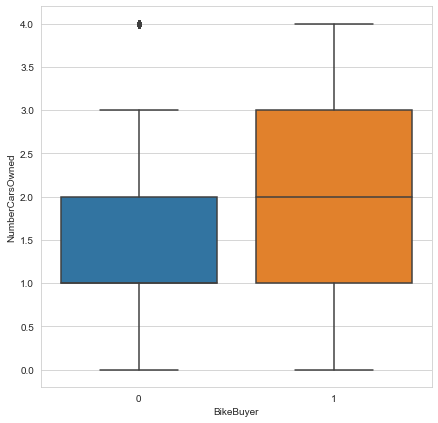

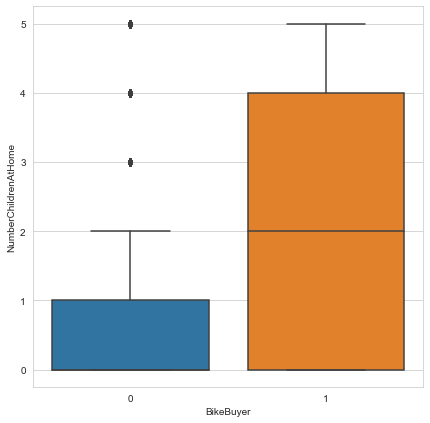

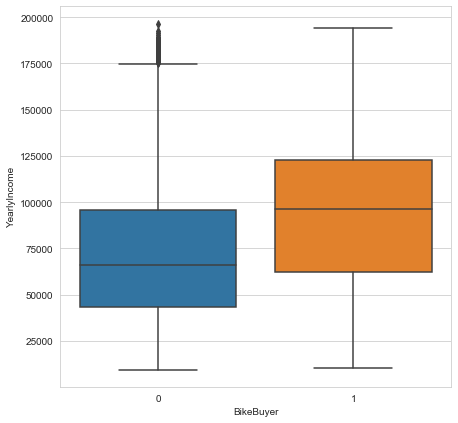

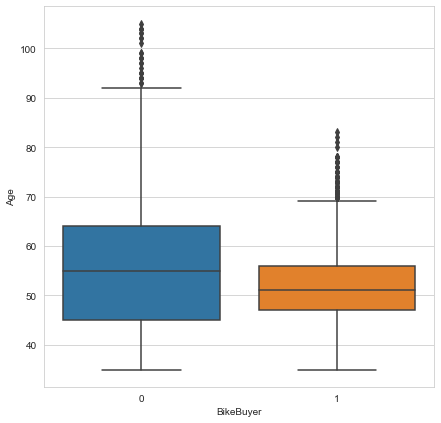

In [160]:
def plot_violin(credit, cols, col_x = 'BikeBuyer'):
    for col in cols:
        fig= plt.figure(figsize=(7,7))
        sns.set_style("whitegrid")
        fig=sns.boxplot(col_x,col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

CountryRegionName


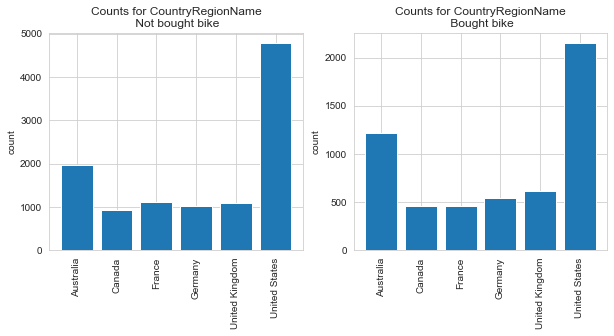

Education


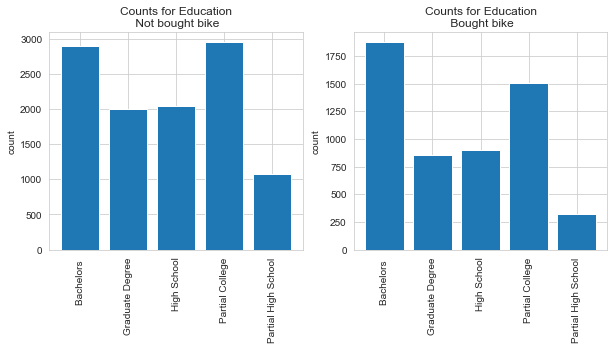

Occupation


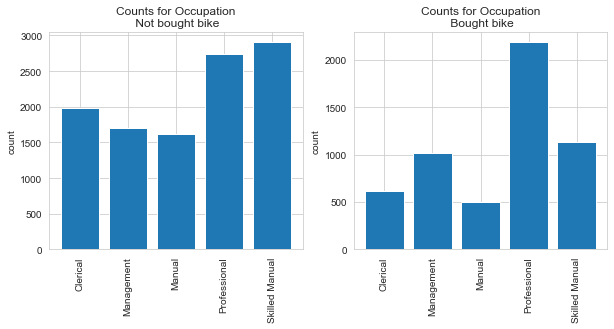

Gender


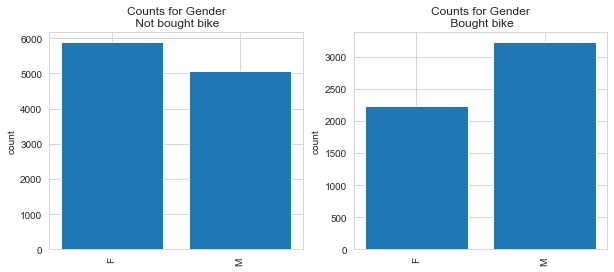

MaritalStatus


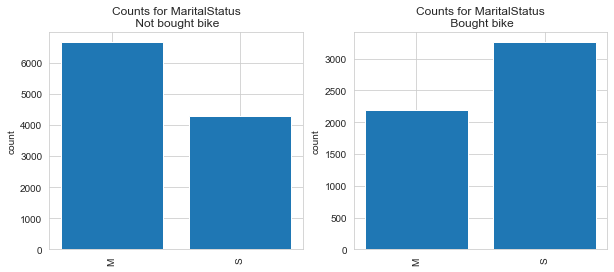

HomeOwnerFlag


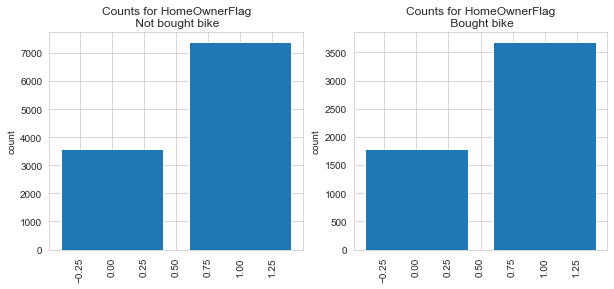

In [161]:
dummydf=df.copy()
dummydf['dummy'] = np.ones(shape = dummydf.shape[0])
for col in cat_cols:
    print(col)
    counts = dummydf[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not bought bike')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bought bike')
    plt.ylabel('count')
    plt.show()

In [162]:
usenum_col=["NumberCarsOwned","NumberChildrenAtHome","YearlyIncome","Age"]
usecat_col=["Occupation","Gender","MaritalStatus"]


## Model Selection